In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Introduction

### [DIGIT Recognizer](https://www.kaggle.com/c/digit-recognizer)
<img src="images/front_page.png" style="width:350px;height:200px;">

# Data load & Pretreatment

In [2]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [3]:
df_train.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test.tail()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
dfY = df_train["label"]
dfY = pd.get_dummies(dfY)
dfY = dfY.as_matrix().reshape(len(dfY), -1).T

In [6]:
dfX = df_train.drop("label", axis = 1)
dfX /= np.max(np.max(dfX))
dfX = dfX.as_matrix().reshape(len(dfX), -1).T

In [7]:
df_test /= np.max(np.max(df_test))
df_test = df_test.as_matrix().reshape(len(df_test), -1).T

In [8]:
del df_train

# EDA

#### data shape

In [9]:
np.shape(dfX), np.shape(dfY), np.shape(df_test)

((784, 42000), (10, 42000), (784, 28000))

#### train set images

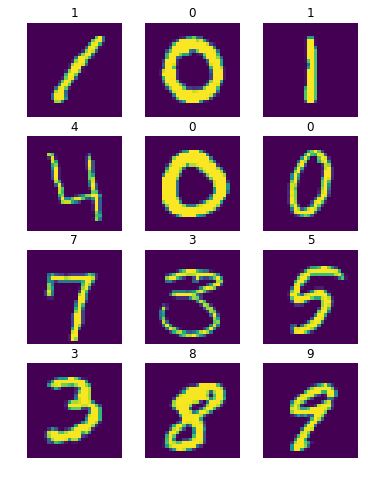

In [10]:
plt.figure(figsize=(6, 8))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.imshow(dfX[:, i].reshape(28,28))
    plt.axis('off')
    plt.title(np.where(dfY[:, i] == 1)[0][0])
plt.show()

#### test set images

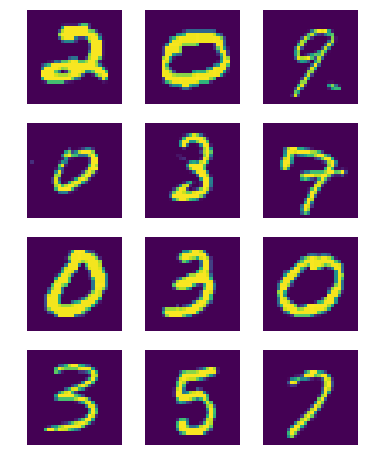

In [11]:
plt.figure(figsize=(6, 8))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.imshow(df_test[:, i].reshape(28,28))
    plt.axis('off')
plt.show()

#### labels distribution

[4132 4684 4177 4351 4072 3795 4137 4401 4063 4188]


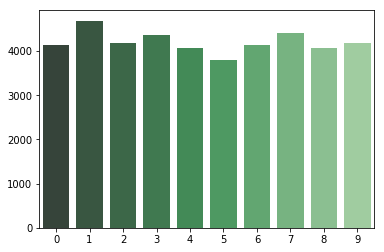

In [12]:
sns.barplot(list(range(10)), np.sum(dfY, axis=1), palette='Greens_d')
print(np.sum(dfY, axis=1))

In [13]:
#check None Value
# assert(dfX.isnull().any().count() == np.shape(dfX)[1])
# assert(dfY.isnull().any().count() == np.shape(dfY)[1])

# function

In [14]:
def layer_sizes(dfX, dfY):
    """
    Arguments:
    dfX -- input dataset of shape (input size, number of examples)
    dfY -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_hi -- the size of the hidden layer
    n_y -- the size of the output layer
    """

    n_x = dfX.shape[0]      # size of input layer
    n_h1 = 128
    n_h2 = 128
    n_h3 = 128
    n_y = dfY.shape[0]      # size of output layer
    layer_dims = (n_x, n_h1, n_h2, n_h3, n_y)
    
    return layer_dims

In [15]:
layer_dims = layer_sizes(dfX, dfY)
layer_dims

(784, 128, 128, 128, 10)

In [16]:
def initialize_parameters(layer_dims):
    """
    Argument:
    layer_dims -- output of layer_sizes()
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h1, n_x)
                    b1 -- bias vector of shape (n_h1, 1)
                    W2 -- weight matrix of shape (n_h2, n_h1)
                    b2 -- bias vector of shape (n_h2, 1)
                    W3 -- weight matrix of shape (n_y, n_h2)
                    b3 -- bias vector of shape (n_y, 1)
    """
    np.random.seed(0)
    
    parameters = {}
    L = len(layer_dims)   
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.1
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
    
    return parameters

In [17]:
parameters = initialize_parameters(layer_dims)
# parameters

In [18]:
for i in parameters.keys():
    print("shape {} :".format(i), np.shape(parameters[i]))

shape W1 : (128, 784)
shape b1 : (128, 1)
shape W2 : (128, 128)
shape b2 : (128, 1)
shape W3 : (128, 128)
shape b3 : (128, 1)
shape W4 : (10, 128)
shape b4 : (10, 1)


In [19]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    Z = np.dot(W, A) + b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [20]:
A, W, b = dfX, parameters['W1'], parameters['b1']
Z, linear_cache = linear_forward(A, W, b)
print(Z.shape)
print("Z = " + str(Z))

(128, 42000)
Z = [[ -7.77738152e-01  -4.35866678e+00  -9.80310349e-01 ...,  -2.30466824e+00
   -2.18948154e+00  -1.64403224e+00]
 [  2.09005949e+00   8.63554220e-01  -3.32598141e-01 ...,  -2.71707471e-01
    6.42573448e-01   4.09528535e-01]
 [ -6.14081593e-01   4.39410513e-01  -8.24271316e-01 ...,  -8.79024755e-01
   -5.63683133e-01  -1.19716513e+00]
 ..., 
 [ -3.86671274e-01   2.83271352e-01   2.63957027e-01 ...,   3.45443681e-01
   -1.93734851e-01  -8.11186681e-02]
 [ -7.38926893e-03   2.80773043e+00   1.94340708e-01 ...,   3.90852399e-01
    9.12904122e-01   4.30378264e-01]
 [  5.39345447e-01  -1.63787572e+00  -2.72880756e-03 ...,  -7.97527727e-01
   -1.20683291e+00  -8.83847535e-01]]


In [21]:
def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = 1/(1+np.exp(-Z))
    
    assert(A.shape == Z.shape)
    
    cache = Z
    
    return A, cache

In [22]:
sigmoid(Z)[0]

array([[ 0.31480757,  0.01263378,  0.27283021, ...,  0.09073708,
         0.10069904,  0.16191714],
       [ 0.88993325,  0.7034027 ,  0.41760859, ...,  0.43248796,
         0.65533496,  0.60097483],
       [ 0.35112869,  0.60811856,  0.30485773, ...,  0.29337991,
         0.36269568,  0.23197991],
       ..., 
       [ 0.40451888,  0.57034806,  0.56560877, ...,  0.58551225,
         0.45171721,  0.47973145],
       [ 0.49815269,  0.94309214,  0.54843284, ...,  0.59648788,
         0.71359407,  0.60596399],
       [ 0.63166014,  0.16275432,  0.4993178 , ...,  0.31055461,
         0.23026191,  0.29238111]])

In [23]:
def relu(Z):
    """
    Implement the RELU activation in numpy.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache

In [24]:
relu(Z)[0]

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.09005949,  0.86355422,  0.        , ...,  0.        ,
         0.64257345,  0.40952854],
       [ 0.        ,  0.43941051,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.28327135,  0.26395703, ...,  0.34544368,
         0.        ,  0.        ],
       [ 0.        ,  2.80773043,  0.19434071, ...,  0.3908524 ,
         0.91290412,  0.43037826],
       [ 0.53934545,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [25]:
def softmax(Z):
    """
    Implement the softmax activation in numpy.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.exp(Z) / sum(np.exp(Z))
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache

In [26]:
softmax(Z)[0]

array([[  2.68911192e-03,   4.72370679e-05,   2.11265473e-03, ...,
          3.74112937e-04,   5.58444405e-04,   1.01407731e-03],
       [  4.73235777e-02,   8.75517224e-03,   4.03762857e-03, ...,
          2.85697455e-03,   9.48256431e-03,   7.90535137e-03],
       [  3.16726221e-03,   5.72877048e-03,   2.46942260e-03, ...,
          1.55650968e-03,   2.83827989e-03,   1.58541508e-03],
       ..., 
       [  3.97600632e-03,   4.90062021e-03,   7.33173876e-03, ...,
          5.29580167e-03,   4.10886353e-03,   4.83989349e-03],
       [  5.80987980e-03,   6.11800313e-02,   6.83869128e-03, ...,
          5.54182066e-03,   1.24259304e-02,   8.07190607e-03],
       [  1.00371639e-02,   7.17641386e-04,   5.61547885e-03, ...,
          1.68867291e-03,   1.49189693e-03,   2.16877794e-03]])

In [27]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu" or "tanh" or "softmax"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    Z, linear_cache = linear_forward(A_prev, W, b)  
    
    if activation == "sigmoid":
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        A, activation_cache = relu(Z)
        
    elif activation == "softmax":
        A, activation_cache = softmax(Z)   
        
    elif activation == "tanh":
        A, activation_cache = np.tanh(Z), Z
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    
    cache = (linear_cache, activation_cache)  

    return A, cache     # g(Z), ((A, W, b), g(Z))

In [28]:
A_prev, W, b = dfX, parameters['W1'], parameters['b1']

In [29]:
linear_activation_forward(A_prev, W, b, activation='tanh')[0]

array([[-0.65140655, -0.99967261, -0.75320022, ..., -0.98027954,
        -0.97523382, -0.92803415],
       [ 0.96986755,  0.69808437, -0.32085339, ..., -0.26521292,
         0.56664924,  0.38807229],
       [-0.54699385,  0.4131557 , -0.67738797, ..., -0.70593041,
        -0.51070505, -0.83278787],
       ..., 
       [-0.36848702,  0.27593008,  0.25799293, ...,  0.33232859,
        -0.19134687, -0.08094121],
       [-0.00738913,  0.99274416,  0.19193047, ...,  0.37209484,
         0.72252322,  0.40563738],
       [ 0.49249233, -0.92717502, -0.0027288 , ..., -0.66265236,
        -0.83572694, -0.70834159]])

In [50]:
def L_model_forward(X, parameters):
    """
    Implement forward propagation for the LINEAR -> RELU -> LINEAR  TANH -> LINEAR -> SIGMOID -> LINEAR -> SOFTMAX computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2
    
#     for l, act in zip(range(1, L), ['relu', 'tanh', 'sigmoid']):
    for l in range(1, L):
        A_prev = A 
#         A, cache = linear_activation_forward(A_prev, parameters['W{}'.format(l)], parameters['b{}'.format(l)], activation = act)
        A, cache = linear_activation_forward(A_prev, parameters['W{}'.format(l)], parameters['b{}'.format(l)], activation = 'relu')
        caches.append(cache)
    
    AL, cache = linear_activation_forward(A, parameters['W{}'.format(L)], parameters['b{}'.format(L)], activation = "softmax")
    caches.append(cache)
    
    assert(AL.shape == (10, X.shape[1]))
            
    return AL, caches    # A[4], ((A[0], W1, b1, (Z1)), (A[1], W2, b2, (Z2)), (A[2], W3, b3, (Z3)), (A[3], W4, b4, (Z4)))

In [51]:
A4, caches = L_model_forward(dfX, parameters)
print(A4.shape)
A4

(10, 42000)


array([[ 0.073156  ,  0.09848152,  0.11171709, ...,  0.13684389,
         0.1500705 ,  0.12275903],
       [ 0.14418204,  0.0682603 ,  0.08031119, ...,  0.1552389 ,
         0.07529559,  0.07953822],
       [ 0.10199908,  0.11637212,  0.10497186, ...,  0.18332692,
         0.1235681 ,  0.12304256],
       ..., 
       [ 0.08215915,  0.07488257,  0.08623227, ...,  0.05273489,
         0.05711142,  0.09161985],
       [ 0.09021555,  0.07555457,  0.10281009, ...,  0.08468924,
         0.10822773,  0.10765895],
       [ 0.09969229,  0.10386903,  0.12451631, ...,  0.14443351,
         0.09115748,  0.10639663]])

### Loss function
$$ L = -\frac{1}{m}\Sigma_jY_jlogP_j $$

In [52]:
def compute_cost(AL, Y):
    """
    Implement the cost function.

    Arguments:
    AL -- probability matrix, output of the forward propagation (L_model_forward())
    Y -- ture"label" numpy ndarray
    
    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    cost = -1/m * np.sum(np.sum(Y * np.log(AL), axis = 1, keepdims=True))
    
    assert(cost.shape == ())
    
    return cost

In [53]:
cost = compute_cost(A4, dfY)
cost

2.3882293178060072

### Backword propagation 
+ input : $da^{[l]}$ 
+ output : $da^{[l-1]}, dW^{[l]}, db^{[l]}$

$$ dZ^{[l]} = da^{[l]} * g^{[l]'}(Z^{[l]}) $$

$$ dW^{[l]} = dZ^{[l]} * a^{[l-1]}$$

$$ db^{[l]} = dZ^{[l]} $$

$$ da^{[l-1]} = W^{[l]T} \bullet dz^{[l]}  $$

$$ dZ^{[l]} = W^{[l+1]T} \bullet dZ^{[l+1]} * g^{[l]'}(Z^{[l]}) $$

In [54]:
def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """

    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1 / m * np.dot(dZ,A_prev.T)
    db = 1 / m * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

#### 4-layer (softmax)
+ differential

$$ a^{[4]}_i = P_i = \frac{e^{Z^{[4]}_i}}{\Sigma_i e^{Z^{[4]}_i}} $$

$$ g^{[4]'}_i(Z^{[4]}_i) = \frac{\partial g(Z^{[4]}_i)}{\partial Z^{[4]}_i} = P_i(1 - P_i)$$

$$ g^{[4]'}_j(Z^{[4]}_i) = \frac{\partial g(Z^{[4]}_i)}{\partial Z^{[4]}_j} = - P_i * P_j $$

+ input
$$ da^{[4]} = \frac{\partial L}{\partial a^{[4]}_i} = P_i - y_i$$

+ output

$$ dZ^{[4]}_i = \frac{\partial L}{\partial a^{[4]}_i}\frac{\partial a^{[4]}_i}{\partial Z^{[4]}_i} = (P_i - y_i){P_i(1 - P_i)}$$

$$ da^{[3]} = W^{[4]T} \bullet dZ^{[4]}_i  $$

$$ dW^{[4]} = dZ^{[4]}_i * a^{[3]}$$

$$ db^{[4]} = dZ^{[4]}_i $$

In [55]:
def softmax_backward(dA, cache):
    """
    Implement the backward propagation for a single Softmax unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    p, _ = softmax(Z)
    dZ = dA * p * (1 - p)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

#### 3-layer (sigmoid)
+ differential
$$ a^{[3]}_i = \frac{1}{1 + e^{Z^{[3]}_i}} $$

$$ g^{[3]'}(Z^{[3]}_i) = \frac{\partial g(Z^{[3]}_i)}{\partial Z^{[3]}_i} = \frac{1}{1 + e^{Z^{[3]}_i}}{(1 -  \frac{1}{1 + e^{Z^{[3]}_i}})} = a^{[3]}_i(1 - a^{[3]}_i)$$

+ input
$$ da^{[3]} = \frac{\partial L}{\partial a^{[3]}_i} = W^{[4]T} \bullet dZ^{[4]}_i  $$

+ output

$$ dZ^{[3]}_i = \frac{\partial L}{\partial a^{[3]}_i}\frac{\partial a^{[3]}_i}{\partial Z^{[3]}_i} = W^{[4]T} \bullet dZ^{[4]}_i * a^{[3]}_i(1 - a^{[3]}_i)$$

$$ da^{[2]} = W^{[3]T} \bullet dZ^{[3]}_i  $$

$$ dW^{[3]} = dZ^{[3]}_i * a^{[2]}$$

$$ db^{[3]} = dZ^{[3]}_i $$

In [56]:
def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    s, _ = sigmoid(Z)
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

#### 2-layer (tanh)
+ differential
$$ a^{[2]}_i = tanh(Z^{[2]}_i) = \frac{1 - e^{Z^{[2]}_i}}{1 + e^{Z^{[2]}_i}} $$

$$ g^{[2]'}(Z^{[2]}_i) = \frac{\partial a^{[2]}_i}{\partial Z^{[2]}_i} = (1 - \frac{1 - e^{Z^{[2]}_i}}{1 + e^{Z^{[2]}_i}})(1 + \frac{1 - e^{Z^{[2]}_i}}{1 + e^{Z^{[2]}_i}}) = (1 - a^{[2]}_i)(1 + a^{[2]}_i)$$

+ input
$$ da^{[2]} = \frac{\partial L}{\partial a^{[2]}_i} = W^{[3]T} \bullet dZ^{[3]}_i  $$

+ output
$$ dZ^{[2]}_i = \frac{\partial L}{\partial a^{[2]}_i}\frac{\partial a^{[2]}_i}{\partial Z^{[2]}_i} = W^{[3]T} \bullet dZ^{[3]}_i * (1 - a^{[2]}_i)(1 + a^{[2]}_i)$$

$$ da^{[1]} = W^{[2]T} \bullet dZ^{[2]}_i  $$

$$ dW^{[2]} = dZ^{[2]}_i * a^{[1]}$$

$$ db^{[2]} = dZ^{[2]}_i $$

In [57]:
def tanh_backward(dA, cache):
    """
    Implement the backward propagation for a single Tanh unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    t = np.tanh(Z)
    dZ = dA * (1 - t) * (1 + t)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

#### 1-layer (relu)
+ differential

$$ a^{[1]}_i = max({0, Z^{[1]}_i})$$

$$ g^{[1]'}(Z^{[1]}_i) = \frac{\partial a^{[1]}_i}{\partial Z^{[1]}_i} =\begin{cases}
0, & \mbox{if }Z^{[1]}_i \le 0 \\
1, & \mbox{if }Z^{[1]}_i > 0
\end{cases}$$

+ input
$$ da^{[1]} = W^{[2]T} \bullet dZ^{[2]}_i  $$

+ output
$$ dZ^{[1]}_i = \frac{\partial L}{\partial a^{[1]}_i}\frac{\partial a^{[1]}_i}{\partial Z^{[1]}_i} = \begin{cases}
0, & \mbox{if }Z^{[1]}_i \le 0 \\
 W^{[2]T} \bullet dZ^{[2]}_i, & \mbox{if }Z^{[1]}_i > 0
\end{cases}$$

$$ da^{[0]} = W^{[1]T} \bullet dZ^{[1]}_i  $$

$$ dW^{[1]} = dZ^{[1]}_i * a^{[0]}$$

$$ db^{[1]} = dZ^{[1]}_i $$

In [58]:
def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [59]:
def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu" or "tanh" or "softmax"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "tanh":
        dZ = tanh_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "softmax":
        dZ = softmax_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

In [60]:
dA_prev, dW, db = linear_activation_backward(dA=A4 - dfY, cache=caches[3], activation='softmax')
# dA_prev, dW, db

In [61]:
def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the LINEAR -> RELU -> LINEAR  TANH -> LINEAR -> SIGMOID -> LINEAR -> SOFTMAX group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- ture"label" numpy ndarray
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches)         
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) 
    
    # Initializing the backpropagation
    dAL = AL - dfY
    
    current_cache = caches[L-1]
    grads["dA" + str(L - 1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "softmax")
    
#     for l, act_func in zip(reversed(range(L-1)), ['sigmoid', 'tanh', 'relu']):
    for l in reversed(range(L-1)):
        current_cache = caches[l]
#         dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA"+str(l + 1)], current_cache, activation = act_func)
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA"+str(l + 1)], current_cache, activation = 'relu')
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [62]:
grads = L_model_backward(A4, dfY, caches)
# grads

In [63]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 

    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l + 1)]
        
    return parameters

In [64]:
parameters = update_parameters(parameters, grads, learning_rate=0.02)
# parameters

# modeling

In [65]:
def L_layer_model(dfX, dfY, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a L-layer neural network: LINEAR -> RELU -> LINEAR  TANH -> LINEAR -> SIGMOID -> LINEAR -> SOFTMAX.
    
    Arguments:
    X -- data, numpy ndarray of shape (num_px * num_px, number of examples)
    Y -- ture"label" numpy ndarray (containing 0, 1), of shape (10, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []
    
    layers_dims = layer_sizes(dfX, dfY)
    
    parameters = initialize_parameters(layers_dims)
    
    for i in range(0, num_iterations):

        AL, caches = L_model_forward(dfX, parameters)
        
        cost = compute_cost(AL, dfY)
        
        grads = L_model_backward(AL, dfY, caches)

        parameters = update_parameters(parameters, grads, learning_rate)
                
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" %(i, cost))
            costs.append(cost)
            
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 2.389356
Cost after iteration 100: 2.314593
Cost after iteration 200: 2.253378
Cost after iteration 300: 2.195998
Cost after iteration 400: 2.137847
Cost after iteration 500: 2.075824
Cost after iteration 600: 2.007432
Cost after iteration 700: 1.930500
Cost after iteration 800: 1.843955
Cost after iteration 900: 1.748280
Cost after iteration 1000: 1.646050
Cost after iteration 1100: 1.542595
Cost after iteration 1200: 1.450317
Cost after iteration 1300: 1.393352
Cost after iteration 1400: 1.437984


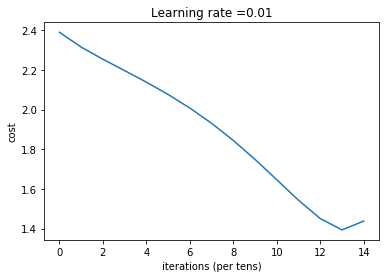

Wall time: 1h 2min 51s


In [66]:
%%time
parameters = L_layer_model(dfX, dfY, learning_rate = 0.01, num_iterations = 1500, print_cost=True)

In [67]:
parameters

{'W1': array([[ 0.17640523,  0.04001572,  0.0978738 , ...,  0.05213037,
          0.06119272, -0.13414967],
        [ 0.04768984,  0.01484496,  0.05290452, ...,  0.00960042,
         -0.00451133,  0.00791217],
        [ 0.08505307, -0.08391242, -0.10117741, ..., -0.00722388,
          0.03111244, -0.10783611],
        ..., 
        [ 0.20717158, -0.03598082,  0.14251868, ...,  0.06307309,
          0.0668623 , -0.08363482],
        [-0.05782998, -0.06807925, -0.01028094, ..., -0.0820083 ,
         -0.03597955,  0.01188161],
        [-0.08078943, -0.06227641, -0.21208843, ..., -0.04559411,
          0.10440344,  0.12773948]]),
 'W2': array([[-0.05561074,  0.16656502,  0.02526298, ...,  0.0540604 ,
         -0.03989539, -0.12331162],
        [-0.04515199,  0.12251403, -0.19575366, ..., -0.0259569 ,
          0.16258287,  0.0028884 ],
        [ 0.15162653, -0.09606347, -0.04693365, ...,  0.04713492,
         -0.14435164,  0.0500463 ],
        ..., 
        [ 0.10885931,  0.16400169, -0.14

In [68]:
test, _ = L_model_forward(df_test, parameters)

In [69]:
pd.DataFrame(test)

,0,1,2,3,4,5,6,7,8,9,...,27990,27991,27992,27993,27994,27995,27996,27997,27998,27999
0,0.127222,0.795582,0.006293,0.016792,0.005211,0.006149,9.860838e-01,0.005361,0.871301,0.032114,...,0.008124,0.033227,0.035922,0.000526,0.016823,0.002201,0.007062,0.005247,0.004123,0.101726
1,0.000264,0.000056,0.051340,0.013763,0.032365,0.014147,8.211672e-07,0.001780,0.000046,0.114643,...,0.002437,0.003750,0.252197,0.016664,0.005761,0.003298,0.007122,0.018075,0.000735,0.000761
2,0.738120,0.101862,0.084623,0.224069,0.252956,0.061515,4.761573e-03,0.023450,0.036291,0.089986,...,0.049621,0.321214,0.137808,0.058139,0.033716,0.057281,0.046612,0.022991,0.018053,0.561306
3,0.025619,0.014486,0.126572,0.029872,0.244444,0.026673,2.215943e-03,0.859447,0.042833,0.518086,...,0.046746,0.021120,0.143883,0.010138,0.029737,0.060712,0.046957,0.708077,0.078136,0.066786
4,0.010059,0.001870,0.225041,0.190662,0.094084,0.131309,2.168860e-04,0.023425,0.005105,0.063234,...,0.148169,0.021160,0.096055,0.369509,0.088599,0.234281,0.169580,0.057915,0.187470,0.049368
5,0.000008,0.000006,0.000250,0.000582,0.000247,0.000060,7.328601e-07,0.000007,0.000009,0.001332,...,0.000010,0.000045,0.013040,0.000011,0.000152,0.000003,0.000234,0.000031,0.000002,0.000011
6,0.067523,0.075731,0.052223,0.070557,0.087171,0.020301,5.572475e-03,0.009601,0.016456,0.083706,...,0.007804,0.520171,0.103351,0.008672,0.009327,0.025490,0.012753,0.005897,0.005477,0.077275
7,0.003959,0.002750,0.114890,0.198534,0.142711,0.529252,7.497224e-05,0.030022,0.003982,0.036934,...,0.477532,0.003153,0.043807,0.279602,0.584564,0.267273,0.478408,0.077928,0.076533,0.020900
8,0.018928,0.003554,0.263456,0.151174,0.088093,0.034527,7.178981e-04,0.034894,0.017205,0.043435,...,0.043949,0.066229,0.125177,0.080939,0.022798,0.046559,0.041929,0.075274,0.162873,0.065352
9,0.008299,0.004103,0.075311,0.103995,0.052717,0.176067,3.549069e-04,0.012013,0.006772,0.016530,...,0.215607,0.009930,0.048759,0.175799,0.208522,0.302902,0.189344,0.028566,0.466598,0.056514


In [70]:
# test = pd.DataFrame(pd.DataFrame(test).idxmax(), columns=['Label'])
# test.index.name='ImageId'
# test.index += 1 
# test

In [72]:
# test.to_csv('test.csv')